## Load dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk, re, string
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = []
for i in range(1, 8):
    df = pd.read_csv('./dataset/inshort_news_data-' + str(i) + '.csv')
    data.append(df)

df = pd.concat(data, ignore_index=False)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ndhel97\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [2]:
# Drop kolom yang tidak diperukan
df = df.drop(columns=['Unnamed: 0'])

In [3]:
# Cek jumlah kategori
len(df.news_category.unique())

7

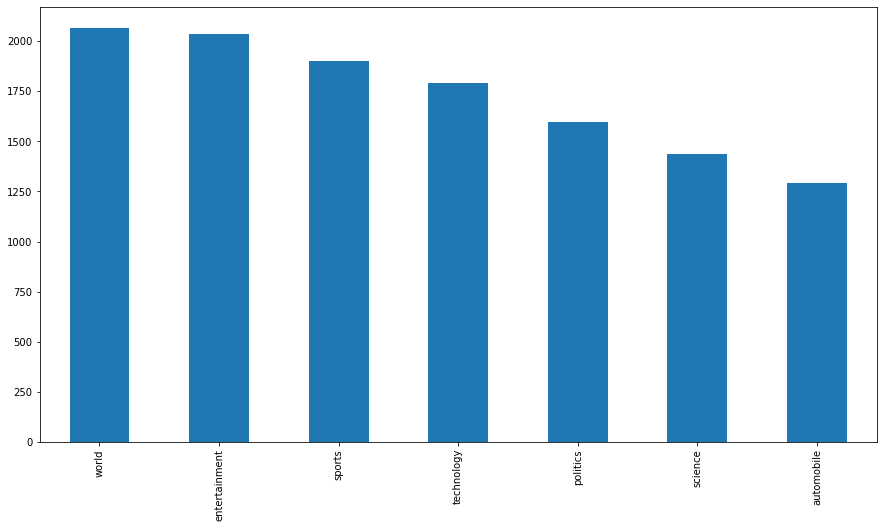

In [4]:
# Cek jumlah data dari masing-masing kategori
plt.figure(figsize=(15,8));
df['news_category'].value_counts().plot.bar();

In [5]:
df.shape

(12120, 3)

## Preprocessing Data

In [6]:
# One hot encoding
category = pd.get_dummies(df.news_category)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='news_category')
df

,news_headline,news_article,automobile,entertainment,politics,science,sports,technology,world
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,0,0,0,1,0,0,0
1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,0,0,0,1,0,0,0
1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,0,0,0,1,0,0,0
1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,0,0,0,1,0,0,0


In [7]:
# Clean Data
# Lowercase all chars 
df.news_headline = df.news_headline.apply(lambda x: x.lower())
df.news_article = df.news_article.apply(lambda x: x.lower())

# Remove numbers
def rem_numbers(text):
    return(text.translate(str.maketrans('', '', '0123456789')))
df.news_headline = df.news_headline.apply(lambda x: rem_numbers(x))
df.news_article = df.news_article.apply(lambda x: rem_numbers(x))

# Remove punctuation
def cleaner(text):
    res = text.translate(str.maketrans('-', ' '))
    res = res.translate(str.maketrans('', '', string.punctuation))
    return(res)
df.news_headline = df.news_headline.apply(lambda x: cleaner(x))
df.news_article = df.news_article.apply(lambda x: cleaner(x))

# Remove stopwords
st_words = stopwords.words()
def stopword(text):
    return(' '.join([w for w in text.split() if w not in st_words ]))
df.news_headline = df.news_headline.apply(lambda x: stopword(x))
df.news_article = df.news_article.apply(lambda x: stopword(x))

In [8]:
df

,news_headline,news_article,automobile,entertainment,politics,science,sports,technology,world
0,year old problem biology solved artificial int...,deepminds system alphafold recognised solution...,0,0,0,0,0,1,0
1,microsoft teams stop working internet explorer...,microsoft teams stop working internet explorer...,0,0,0,0,0,1,0
2,hope us wont erect barriers cooperation china ...,china response reports us adding chinese chipm...,0,0,0,0,0,1,0
3,global smartphone sales q falls cr units gartner,global smartphone sales third quarter fell yea...,0,0,0,0,0,1,0
4,hoping biden clarify us position digital tax r...,european union hoping us president elect joe b...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1737,iaf doctors soon leave russia train gaganyaan ...,two indian air force doctors specialised aeros...,0,0,0,1,0,0,0
1738,nasa finds fm signal coming jupiters moon gany...,nasas juno space probe discovered fm signal em...,0,0,0,1,0,0,0
1739,new state matter liquid glass discovered scien...,university konstanzs researchers uncovered new...,0,0,0,1,0,0,0
1740,astrophysicist shashikumar madhusudan chitre p...,renowned astrophysicist professor shashikumar ...,0,0,0,1,0,0,0


In [9]:
# Combine news_headline and news_article
news = df['news_headline'].values + ' ' + df['news_article'].values
label = df.drop(['news_article', 'news_headline'], axis=1).values

In [10]:
# Split data into train and test
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [11]:
# Inisiasi tokenizer
tokenizer = Tokenizer(num_words=5000)

# fit tokenizer
tokenizer.fit_on_texts(news_train)

# tokenize data
X_train = tokenizer.texts_to_sequences(news_train)
X_test = tokenizer.texts_to_sequences(news_test)

X_train = pad_sequences(X_train, padding='post', maxlen=256) 
X_test = pad_sequences(X_test, padding='post', maxlen=256)

vocab_size = len(tokenizer.word_index) + 1

In [12]:
import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
# Create embedding matrix using glove
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 200
embedding_matrix = create_embedding_matrix('./dataset/glove.6B.200d.txt',tokenizer.word_index, embedding_dim)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GlobalMaxPool1D, Conv1D, Dropout

# Inisisasi model sekuensial
model = Sequential()

# membuat embedding layer
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=256, trainable=False))

# inisiasi 1D Convolutional layer
model.add(Conv1D(128, 5, activation='relu'))

# # inisiasi pooling layer
# model.add(GlobalMaxPool1D())

# # inisiasi hidden dense layer
# model.add(Dense(10, activation='relu'))

# # Inisisasi output layer
# model.add(Dense(units=7, activation='softmax'))

# Global Pooling
model.add(GlobalMaxPool1D())

model.add(Dropout(0.5))

# Inisiasi Dense layer
model.add(Dense(256, activation='relu'))

# Inisiasi Dense layer
model.add(Dense(128, activation='relu'))

# Inisiasi Dense layer
model.add(Dense(64, activation='relu'))

# Inisiasi Dense layer
model.add(Dense(32, activation='relu'))

# Inisiasi Output layer
model.add(Dense(7, activation='softmax'))

# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# lihat summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 200)          4358400   
_________________________________________________________________
conv1d (Conv1D)              (None, 252, 128)          128128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [15]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=2)

num_epochs = 20
history = model.fit(X_train, label_train, epochs=num_epochs,
                    validation_data=(X_test, label_test), verbose=2, callbacks=[es])

Epoch 1/20
303/303 - 33s - loss: 0.7781 - accuracy: 0.7242 - val_loss: 0.3034 - val_accuracy: 0.9068
Epoch 2/20
303/303 - 26s - loss: 0.3265 - accuracy: 0.8980 - val_loss: 0.2588 - val_accuracy: 0.9220
Epoch 3/20
303/303 - 26s - loss: 0.2622 - accuracy: 0.9193 - val_loss: 0.2251 - val_accuracy: 0.9286
Epoch 4/20
303/303 - 26s - loss: 0.2286 - accuracy: 0.9283 - val_loss: 0.2092 - val_accuracy: 0.9439
Epoch 5/20
303/303 - 26s - loss: 0.1940 - accuracy: 0.9368 - val_loss: 0.2104 - val_accuracy: 0.9418
Epoch 6/20
303/303 - 26s - loss: 0.1802 - accuracy: 0.9435 - val_loss: 0.1995 - val_accuracy: 0.9344
Epoch 7/20
303/303 - 26s - loss: 0.1695 - accuracy: 0.9432 - val_loss: 0.2035 - val_accuracy: 0.9365
Epoch 8/20
303/303 - 27s - loss: 0.1566 - accuracy: 0.9481 - val_loss: 0.1960 - val_accuracy: 0.9427
Epoch 9/20
303/303 - 28s - loss: 0.1626 - accuracy: 0.9446 - val_loss: 0.1891 - val_accuracy: 0.9455
Epoch 10/20
303/303 - 30s - loss: 0.1421 - accuracy: 0.9528 - val_loss: 0.1865 - val_accura

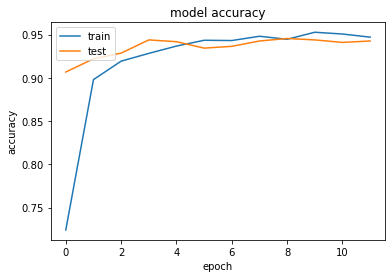

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

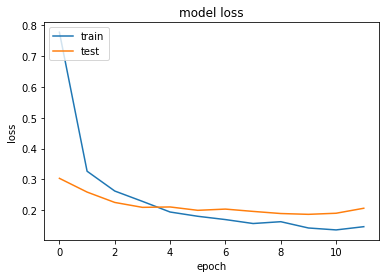

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Save model
model.save('model.h5')